[volver](../README.md)

# DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

* Es un algoritmo de clustering basado en la densidad que puede encontrar clusters de cualquier forma y manejar ruido.
* Es útil para identificar patrones meteorológicos y anomalías sin la necesidad de especificar el número de clusters.

## Carga del Conjunto de Datos:

* Se carga el conjunto de datos weatherAUS.csv utilizando pandas.

## Preprocesamiento de Datos:

* Se seleccionan columnas numéricas relevantes: **MinTemp, MaxTemp, Rainfall, Humidity3pm, Pressure9am, WindSpeed9am, y WindSpeed3pm**.
* Se imputan los valores faltantes con la media de cada columna.
* Se estandarizan los datos para que tengan media 0 y desviación estándar 1 utilizando StandardScaler.

## Aplicación de DBSCAN:
* Se aplica el algoritmo DBSCAN con **eps=0.5** y **min_samples=5**.
* **eps** es el parámetro que define el radio máximo de la vecindad de un punto.
* **min_samples** es el número mínimo de puntos necesarios para formar un cluster.
* Se ajusta el modelo a los datos estandarizados.
* Se añaden las etiquetas de cluster al DataFrame original.




In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos WeatherAUS
data = pd.read_csv('../dataset/weatherAUS.csv')

# Preprocesamiento de Datos
# Seleccionar columnas numéricas relevantes
selected_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity3pm', 'Pressure9am', 'WindSpeed9am', 'WindSpeed3pm']
data = data[selected_columns]

# Imputar valores faltantes con la media de la columna
data = data.fillna(data.mean())

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_scaled)
labels = dbscan.labels_

# Agregar las etiquetas de cluster al DataFrame original
data['Cluster'] = labels


## Visualización de los Clusters:
Se crea una visualización de los clusters utilizando matplotlib, mostrando cómo se agrupan los datos en función de WindSpeed9am y WindSpeed3pm.

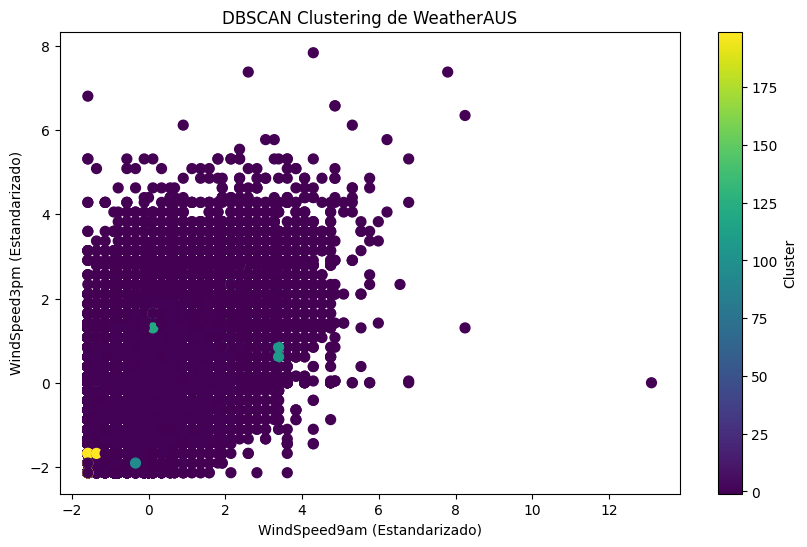

In [2]:
# Visualización de los Clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 5], data_scaled[:, 6], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering de WeatherAUS')
plt.xlabel('WindSpeed9am (Estandarizado)')
plt.ylabel('WindSpeed3pm (Estandarizado)')
plt.colorbar(label='Cluster')
plt.show()

## Interpretación

### Clusters Identificados:

Hay tres colores distintos (morado, amarillo y verde), significa que DBSCAN ha identificado tres clusters diferentes.
Cada color representa un grupo de puntos que están cerca unos de otros en términos de WindSpeed9am y WindSpeed3pm.

### Puntos de Ruido:

No hay puntos negros o grises dispersos en el gráfico, estos podrían ser puntos de ruido.
Lo que significaría que estos puntos no están suficientemente cerca de otros puntos para ser considerados parte de un cluster.

### Relación entre Variables:

Los puntos de color morado (un mismo cluster) nos índica que existe una relación entre WindSpeed9am y WindSpeed3pm.
Podemos ver que los datos del cluster están alineados diagonalmente, esto nos orienta a deducir que hay una correlación entre la velocidad del viento a las 9am y a las 3pm para ese grupo de datos.

## Evaluación de Parámetros

### Epsilon (eps):

Es el radio máximo de la vecindad de un punto.
Valores pequeños de eps pueden hacer que DBSCAN identifique más puntos como ruido y forme más clusters pequeños.
Valores grandes de eps pueden hacer que DBSCAN forme menos clusters, pero más grandes y menos precisos.

### Min_samples:

Es el número mínimo de puntos necesarios para formar un cluster.
Valores pequeños de min_samples pueden hacer que DBSCAN forme muchos clusters pequeños.
Valores grandes de min_samples pueden hacer que DBSCAN forme menos clusters y más puntos sean considerados ruido.


Ajustar estos parámetros según la naturaleza de los datos y los objetivos de análisis es crucial para obtener clusters significativos y útiles.



## Conclusión

Interpretar un gráfico de DBSCAN implica observar cómo los puntos se agrupan en clusters y cómo se identifican los puntos de ruido. Esto puede ayudar a descubrir patrones interesantes y anomalías en los datos meteorológicos, específicamente en la velocidad del viento en diferentes momentos del día.
